## Assignment 2 : Finish Citibikes Mini Project
sjf374, qg412, yg833

Worked with Mei Guan and QY Goh for the initial beginning of this project in HW4. So we worked together to finish the project. We began by reviewing what we had done initially, comparing our notebooks and the comments from our reviewers. We discussed the scope of the assignment.

In [1]:

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt


%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import stats

In [3]:
#Worked with Mei Guan and QY Goh

In [4]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))
#this works in the command line, but is not working in the jupyter notebook when putting data in place

#create the env variable if missing-- needed to create
#added PUI2018 to path 
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))


# # move the data
# !mv bustimes.txt $PUIDATA

PUIdata /nfshome/sjf374/PUIdata
PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [5]:
#from homework 4 citibikes example-- adapted from to adjust for environment variables

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [6]:
# may, august, November, february 2017

In [7]:
months = ['201602','201605','201608', '201611']
for x in months: 
    getCitiBikeCSV(x)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [8]:
##Our groups hypothesis varied slightly, so we made sure to merge 

### Define Hypothesis

IDEA: more people bike on sundays than saturdays

Null hypothesis: 
The average of bike trips on Saturdays are the same or less than the average of bike trips on Sundays per week. 

Alternative hypothesis:  
The average of bike trips on Saturdays are greater than the average of bike trips on Sundays per week. 

p = .05

#### Equation
_$H_0$ : $\frac{sat_{\mathrm{tripquantity}}}{sat_{\mathrm{totalsaturdays}}} <= \frac{sun_{\mathrm{tripquantity}}}{sun_{\mathrm{totalsaturdays}}}$

_$H_1$ : $\frac{sat_{\mathrm{tripquantity}}}{sat_{\mathrm{totalsaturdays}}} > \frac{sun_{\mathrm{tripquantity}}}{sun_{\mathrm{totalsaturdays}}}$

In [9]:
# load the data in

In [10]:
cbdf = {}
for x in months:
    cbdf[x] = pd.read_csv("%s/%s-citibike-tripdata.csv" % (os.getenv("PUIDATA"), x))

In [11]:
#check the column names
for key, value in cbdf.items():
    print (key)
    print (value.columns)

201602
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201611
Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')
201608
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='ob

In [12]:
#the column names are not the same, must set them to be equal
cbdf['201611'].columns = cbdf['201602'].columns

In [13]:
#its all the same now
for key, value in cbdf.items():
    print (key)
    print (value.columns)

201602
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201611
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201608
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object'

In [14]:
#concat all the dataframes together
citibikedf = pd.concat(cbdf.values())

In [15]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [16]:
citibikedf.shape

(4527759, 15)

In [17]:
#need to reset the index
citibikedf.reset_index(drop=True, inplace=True)

In [18]:
#reminder of months used
months

['201602', '201605', '201608', '201611']

In [19]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [20]:
len(citibikedf.index)

4527759

In [21]:
citibikedf['usertype'].value_counts()

Subscriber    4021206
Customer       494019
Name: usertype, dtype: int64

In [22]:
citibikedf['birth year'].unique()

array([ 1966.,  1977.,  1987.,  1983.,  1978.,  1990.,  1991.,  1969.,
          nan,  1986.,  1982.,  1985.,  1960.,  1981.,  1959.,  1984.,
        1979.,  1957.,  1988.,  1992.,  1974.,  1998.,  1972.,  1971.,
        1955.,  1976.,  1970.,  1980.,  1961.,  1996.,  1962.,  1975.,
        1995.,  1973.,  1994.,  1963.,  1954.,  1967.,  1964.,  1993.,
        1989.,  1958.,  1997.,  1956.,  1952.,  1968.,  1953.,  1951.,
        1965.,  1949.,  1999.,  1948.,  1950.,  1941.,  1946.,  1942.,
        1947.,  1885.,  1945.,  1899.,  1934.,  1900.,  1940.,  1944.,
        1938.,  1943.,  1935.,  1939.,  2000.,  1936.,  1932.,  1937.,
        1910.,  1920.,  1918.,  1926.,  1907.,  1917.,  1921.,  1901.,
        1886.,  1895.,  1923.,  1912.,  1931.,  1888.,  1933.,  1893.,
        1913.,  1894.,  1896.,  1909.,  1925.,  1930.])

In [23]:
citibikedf.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.527759e+06,4.010622e+06,4.527759e+06
mean,9.599626e+02,1.060971e+03,4.073798e+01,-7.398613e+01,1.044602e+03,4.073720e+01,-7.398556e+01,2.103537e+04,1.977745e+03,1.097628e+00
std,8.656379e+03,1.180844e+03,2.434534e-02,1.633715e-02,1.170762e+03,1.348342e-01,2.414511e-01,3.561853e+03,1.168295e+01,5.671039e-01
min,6.100000e+01,7.200000e+01,4.064668e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.406419e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.810000e+02,3.400000e+02,4.072110e+01,-7.399725e+01,3.360000e+02,4.072083e+01,-7.399790e+01,1.793400e+04,NaN,1.000000e+00
50%,6.310000e+02,4.650000e+02,4.073913e+01,-7.398802e+01,4.620000e+02,4.073902e+01,-7.398848e+01,2.139200e+04,NaN,1.000000e+00
75%,1.074000e+03,2.003000e+03,4.075510e+01,-7.397711e+01,5.460000e+02,4.075467e+01,-7.397722e+01,2.394700e+04,NaN,1.000000e+00
max,4.319753e+06,3.440000e+03,4.080421e+01,-7.392989e+01,3.440000e+03,4.080421e+01,0.000000e+00,2.734200e+04,2.000000e+03,2.000000e+00


In [ ]:
#citibikedf.info()

In [29]:
#make the starttime a datetime object
citibikedf['starttime'] = pd.to_datetime(citibikedf['starttime'])

In [30]:
#pulls out the weekday from each of the startdates and makes them a new column
#https://docs.python.org/2/library/datetime.html
#Monday is 0 and Sunday is 6
citibikedf['weekday'] = citibikedf['starttime'].apply(lambda x: x.weekday())

In [31]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekday
0,461,2016-02-01 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1,0
1,297,2016-02-01 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1,0
2,280,2016-02-01 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1,0
3,662,2016-02-01 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2,0
4,355,2016-02-01 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1,0


In [32]:
#create new column with date only
citibikedf['date_only'] = citibikedf['starttime'].apply(lambda x: x.date())

In [33]:
#check to make sure all weekdays present
citibikedf['weekday'].value_counts()

0    745881
1    743783
2    741919
3    674636
4    605214
5    526146
6    490180
Name: weekday, dtype: int64

In [34]:
#confirm all dates present
citibikedf['date_only'].unique()

array([datetime.date(2016, 2, 1), datetime.date(2016, 2, 2),
       datetime.date(2016, 2, 3), datetime.date(2016, 2, 4),
       datetime.date(2016, 2, 5), datetime.date(2016, 2, 6),
       datetime.date(2016, 2, 7), datetime.date(2016, 2, 8),
       datetime.date(2016, 2, 9), datetime.date(2016, 2, 10),
       datetime.date(2016, 2, 11), datetime.date(2016, 2, 12),
       datetime.date(2016, 2, 13), datetime.date(2016, 2, 14),
       datetime.date(2016, 2, 15), datetime.date(2016, 2, 16),
       datetime.date(2016, 2, 17), datetime.date(2016, 2, 18),
       datetime.date(2016, 2, 19), datetime.date(2016, 2, 20),
       datetime.date(2016, 2, 21), datetime.date(2016, 2, 22),
       datetime.date(2016, 2, 23), datetime.date(2016, 2, 24),
       datetime.date(2016, 2, 25), datetime.date(2016, 2, 26),
       datetime.date(2016, 2, 27), datetime.date(2016, 2, 28),
       datetime.date(2016, 2, 29), datetime.date(2016, 11, 1),
       datetime.date(2016, 11, 2), datetime.date(2016, 11, 3),
 

In [35]:
#checkout the size of each date and within each weekday
pd.DataFrame(citibikedf[['weekday', 'date_only']].groupby(['weekday', 'date_only']).size())

0
weekday date_only        
0       2016-02-01  24334
        2016-02-08  19026
        2016-02-15   5884
        2016-02-22  28233
        2016-02-29  27954
        2016-05-02  38537
        2016-05-09  45724
        2016-05-16  42787
        2016-05-23  48578
        2016-05-30  32619
        2016-08-01  49401
        2016-08-08  52262
        2016-08-15  49063
        2016-08-22  54404
        2016-08-29  53288
        2016-11-07  49890
        2016-11-14  48834
        2016-11-21  32972
        2016-11-28  42091
1       2016-02-02  28528
        2016-02-09  22741
        2016-02-16  14542
        2016-02-23  16133
        2016-05-03  22858
        2016-05-10  44849
        2016-05-17  43396
        2016-05-24  34796
        2016-05-31  49756
        2016-08-02  56764
        2016-08-09  56112
...                   ...
5       2016-02-27  17226
        2016-05-07  31078
        2016-05-14  42063
        2016-05-21  30519
        2016-05-28  34222
        2016-08-06  44213
        2016-08-13  38912
        2016-08-20  45817
        2016-08-27  45674
        2016-11-05  48689
        2016-11-12  34667
        2016-11-19  41213
        2016-11-26  23811
6       2016-02-07  17605
        2016-02-14   4653
        2016-02-21  20052
        2016-02-28  25437
        2016-05-01  10697
        2016-05-08  31197
        2016-05-15  28661
        2016-05-22  37802
        2016-05-29  36877
        2016-08-07  43631
        2016-08-14  32961
        2016-08-21  35051
        2016-08-28  44639
        2016-11-06  39413
        2016-11-13  36810
        2016-11-20  20617
        2016-11-27  24077

[121 rows x 1 columns]

In [36]:
#make into a new dataframe to graph all days

In [37]:
graphunredacted = pd.DataFrame(citibikedf.groupby(['weekday', 'date_only']).size()).reset_index()
graphunredacted.columns = ['weekday', 'date_only', 'count']

Text(0,0.5,'Trips')

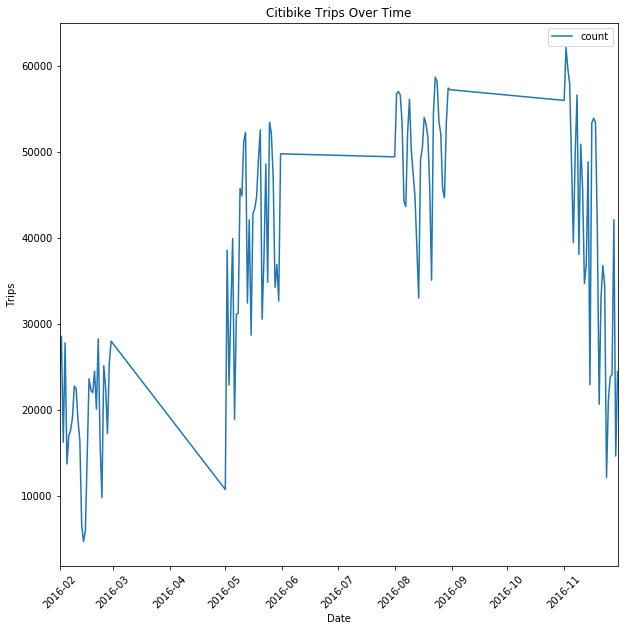

In [38]:
#graph count of all days
graphunredacted.plot.line(x= 'date_only', y ='count' ,rot = 45, figsize = (10,10))
plt.title('Citibike Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Trips')

figure 1: The graph of total trips for each day in February, May, August, November 2016

In [39]:
months

['201602', '201605', '201608', '201611']

In [40]:
graphunredacted.head()

,weekday,date_only,count
0,0,2016-02-01,24334
1,0,2016-02-08,19026
2,0,2016-02-15,5884
3,0,2016-02-22,28233
4,0,2016-02-29,27954


In [41]:
# Scatterplot showing average trip duration for each day of the week.

In [42]:
graphdates = graphunredacted.set_index('date_only')
graphdates.head()

,weekday,count
date_only,,
2016-02-01,0,24334
2016-02-08,0,19026
2016-02-15,0,5884
2016-02-22,0,28233
2016-02-29,0,27954


In [43]:
graphdates['weekday'].unique()

array([0, 1, 2, 3, 4, 5, 6])

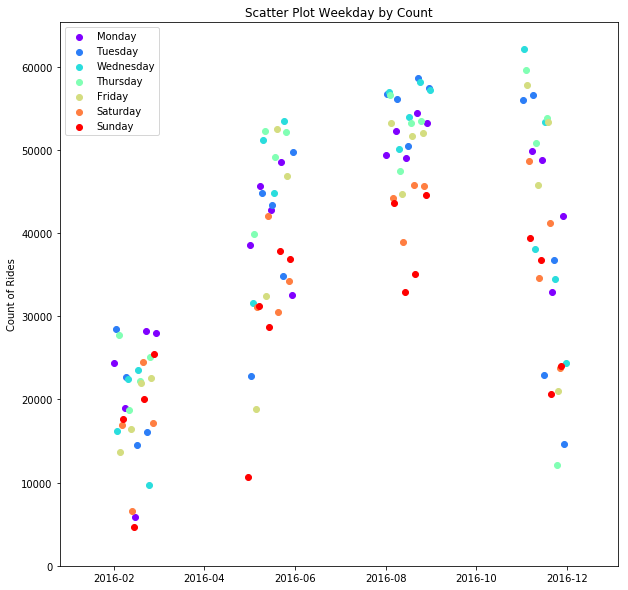

In [44]:
plt.figure(figsize=(10,10))

#https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib/39168267
colors = cm.rainbow(np.linspace(0, 1, len(graphdates['weekday'].unique())))
for x in graphdates['weekday'].unique():

    graphweekday = graphdates[graphdates['weekday'] == x]
    plt.scatter(graphweekday.index, y=graphweekday['count'], color=colors[x])

plt.legend(graphdates['weekday'].unique())
plt.ylim(0)
plt.ylabel('Count of Rides')
plt.title('Scatter Plot Weekday by Count')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Figure 2: scatterplot showing each day's total trip count for all 4 months, color coded according to which day of the week it is where 0 is monday, 1 is tuesday, 2 is wednesday, 3 is thursday, 4 is friday, 5 is saturday and 6 is sunday. It can be observed that generally, Saturdays (orange) and Sundays (red) tend to have lower total trip counts than the rest of the weekday.


In [45]:
graphunredacted.head()

,weekday,date_only,count
0,0,2016-02-01,24334
1,0,2016-02-08,19026
2,0,2016-02-15,5884
3,0,2016-02-22,28233
4,0,2016-02-29,27954


In [46]:
# create graph to map the means and standard dev


In [47]:
errorgraph = pd.concat([pd.DataFrame(graphunredacted.groupby(['weekday'])['count'].mean()), \
          pd.DataFrame(graphunredacted.groupby(['weekday'])['count'].std())], axis=1).reset_index()
errorgraph.columns = ['weekday', 'mean', 'std']

In [48]:
errorgraph.head()

,weekday,mean,std
0,0,39256.894737,13390.667646
1,1,39146.473684,16440.142061
2,2,41217.722222,16431.444793
3,3,42164.750000,15506.624584
4,4,37825.875000,16097.188543


In [49]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

In [50]:
errorgraph['weekdaynm'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0.5,1,'AVG Count of Weekday Rides and the Corresponding Error Bars')

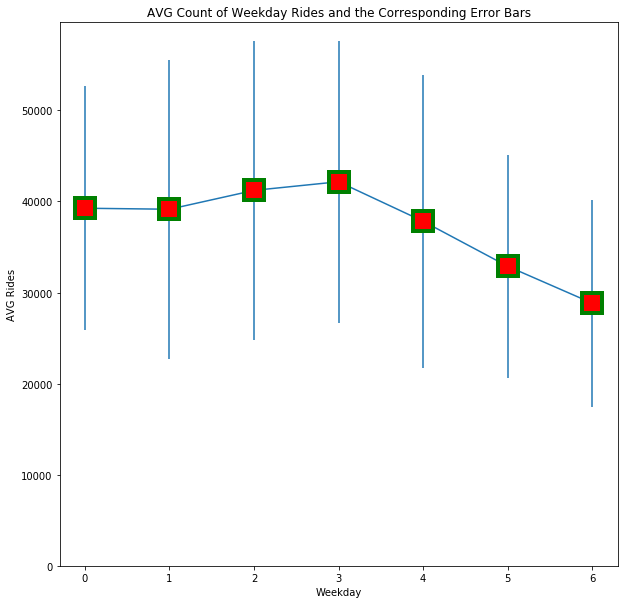

In [51]:
plt.figure(figsize=(10,10))
plt.errorbar(errorgraph['weekday'], errorgraph['mean'], errorgraph['std'], marker='s', mfc='red',
         mec='green', ms=20, mew=4)
plt.ylim(0)
plt.xlabel('Weekday')
plt.ylabel('AVG Rides')
plt.title('AVG Count of Weekday Rides and the Corresponding Error Bars')


In [ ]:
Figure 2: 

In [52]:
errorgraph['std']

0    13390.667646
1    16440.142061
2    16431.444793
3    15506.624584
4    16097.188543
5    12260.505373
6    11372.296602
Name: std, dtype: float64

In [ ]:
pd.DataFrame(graphunredacted.groupby(['weekday'])['count'].var())

In [ ]:
graphunredacted[graphunredacted['weekday'] == 5]['count']

In [ ]:
graphunredacted[graphunredacted['weekday'] == 6]['count']

In [ ]:
graphunredacted['count'].mean()

In [ ]:
sat = graphunredacted[graphunredacted['weekday'] == 5]['count']
sun = graphunredacted[graphunredacted['weekday'] == 6]['count']


In [ ]:
stats.ttest_ind(sat, sun)

In [ ]:
stats.ttest_1samp(sat, sun.mean())

In [ ]:
###plt.bar(x=errorgraph['weekday'], height= errorgraph['mean'], yerr=errorgraph['std'])--- decided the above is better for demonstration 

citibikedf.head()

#create a working dataframe for specific to begin testing hypothesis
wcitidf = citibikedf[['weekday', 'date_only']]

wcitidf = wcitidf[wcitidf['weekday'] > 4]

wcitidf.head()

# confirm the changes
wcitidf['weekday'].value_counts()

#create a new dataframe that will graph the counts of each day for sat and sunday
tographdays = pd.DataFrame(wcitidf.groupby([ 'date_only', 'weekday']).size()).reset_index()

tographdays.head()

tographdays

tographdays.columns

#rename columns
tographdays.columns = ['date_only', 'weekday', 'count']

##https://python-graph-gallery.com/11-grouped-barplot/
#used this documentation to graph

#create two subsets of data (sat and sun)
sat = tographdays[tographdays['weekday'] == 5]['count']
sun = tographdays[tographdays['weekday'] == 6]['count']

#set specific widths so bars line up
barWidth = 0.25
satwidth = np.arange(len(sat))
sunwidth = [x + barWidth for x in satwidth]



sat

sun

len(sat)

len(sun)

#plot figure
plt.figure(figsize=(10,10))


plt.bar(satwidth, sat, color='y', width=barWidth, label='sat')
plt.bar(sunwidth, sun, color='b', width=barWidth, label='sun')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(sat))], ['week1', 'week2', 'week3', 'week4', 'week5'])

plt.title('Citibike Trips for Every Weekend in June')
plt.ylabel('Total Citibike Trips')

plt.xlabel('Week')


plt.legend()
plt.show()


figure 2: This shows the count of citibike trips for each week and compares saturday to sunday amounts. Though not a true test, this graph does yield me to believe the null hypothesis will be able to be rejected


#changed to median since the las

#further manipulation to compare average daily trips for saturdays and sundays in june
avgdaydf = pd.DataFrame(tographdays.groupby(['weekday'])['count'].median()).reset_index()

avgdaydf.head()

#make it easier to read
avgdaydf.replace(5, 'saturday', inplace=True)

avgdaydf.replace(6, 'sunday', inplace= True)

avgdaydf

#plot the two numbers
avgdaydf.plot.bar(x= 'weekday', y ='count' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday in June')



Figure 3: this data shows that for Saturdays in June, there were more trips on average than sundays in june. Though more data might have a different result as it would comply with the central limit theorum, this sample, does not have the ability to reject the null. 